In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("book_genres.csv", sep = ",")
df.head()

,Unnamed: 0,Title,Genre
0,0,When You Are Engulfed in Flames,Humor
1,1,Slaughterhouse-Five,"Fiction,Classics,Science Fiction"
2,2,Crow Mary,Historical Fiction
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","Horror,Historical Fiction"
4,4,The Offing,"Poetry,Travel"


In [6]:
df['Genre'] = df['Genre'].str.split(',')
df.head()

,Unnamed: 0,Title,Genre
0,0,When You Are Engulfed in Flames,[Humor]
1,1,Slaughterhouse-Five,"[Fiction, Classics, Science Fiction]"
2,2,Crow Mary,[Historical Fiction]
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","[Horror, Historical Fiction]"
4,4,The Offing,"[Poetry, Travel]"


In [7]:
# Define the emotion-genre mapping
# emotion_genre_mapping = {
#     'Angry': ['Family', 'Drama', 'Romance', 'Travel'],
#     'Disgust': ['Musical', 'Fantasy', 'History'],
#     'Fear': ['Musical', 'Fantasy', 'Action', 'Sports'],
#     'Happy': ['Action', 'Thriller', 'Sci-Fi'],
#     'Sad': ['Drama', 'Romance', 'Comedy'],
#     'Surprise': ['Thriller', 'Mystery', 'Adventure', 'Horror']
# }

# Define the emotion-genre mapping
emotion_genre_mapping = {
    'Frustration': ['Family', 'Drama', 'Romance', 'Travel','Musical', 'Fantasy', 'History'],
    'Happy': ['Action', 'Thriller', 'Sci-Fi'],
    'Sad': ['Drama', 'Romance', 'Comedy'],
    'Neutral': ['Thriller', 'Mystery', 'Adventure', 'Horror', 'Drama', 'Romance']
}

In [8]:
# Function to map emotions based on genres
def map_emotions(genres):
    emotions = []
    for emotion, genre_list in emotion_genre_mapping.items():
        if any(genre in genres for genre in genre_list):
            emotions.append(emotion)
    return emotions if emotions else ['Unknown']  # Assign 'Unknown' if no emotion is found

# Create a new column 'emotions' and map it based on genres
df['emotions'] = df['Genre'].apply(map_emotions)

# Display the resulting DataFrame
df.head()

,Unnamed: 0,Title,Genre,emotions
0,0,When You Are Engulfed in Flames,[Humor],[Unknown]
1,1,Slaughterhouse-Five,"[Fiction, Classics, Science Fiction]",[Unknown]
2,2,Crow Mary,[Historical Fiction],[Unknown]
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","[Horror, Historical Fiction]",[Neutral]
4,4,The Offing,"[Poetry, Travel]",[Frustration]


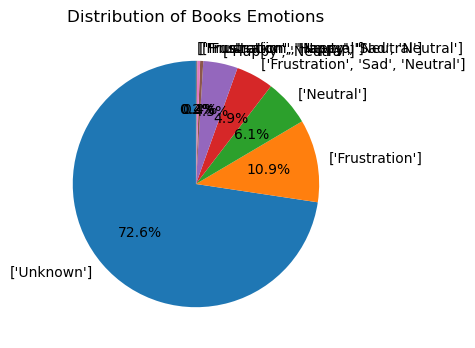

In [9]:
# Count the occurrences of each label
label_counts = df['emotions'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Books Emotions')
plt.show()

In [10]:
df.head(20)

,Unnamed: 0,Title,Genre,emotions
0,0,When You Are Engulfed in Flames,[Humor],[Unknown]
1,1,Slaughterhouse-Five,"[Fiction, Classics, Science Fiction]",[Unknown]
2,2,Crow Mary,[Historical Fiction],[Unknown]
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","[Horror, Historical Fiction]",[Neutral]
4,4,The Offing,"[Poetry, Travel]",[Frustration]
5,5,The Lost Continent: Travels in Small-Town America,[Travel],[Frustration]
6,6,The Omnivore's Dilemma: A Natural History of F...,[Nonfiction],[Unknown]
7,7,Into Thin Air: A Personal Account of the Mount...,"[Nonfiction, Travel]",[Frustration]
8,8,The Road Less Traveled: A New Psychology of Lo...,"[Psychology, Spirituality]",[Unknown]
9,9,When Breath Becomes Air,"[Memoir, Nonfiction, Biography]",[Unknown]


In [12]:
none_emotion = df.loc[df['emotions'].isna()]
none_emotion.Genre.value_counts()

Series([], Name: Genre, dtype: int64)

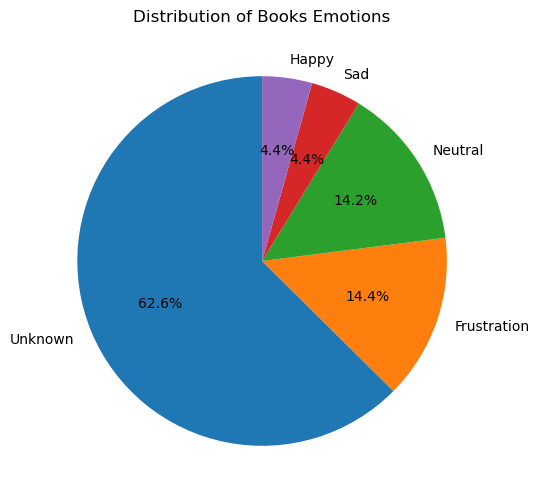

In [13]:
# Flatten the list of emotions
all_emotions = [emotion for emotions_list in df['emotions'] for emotion in emotions_list]

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Books Emotions')
plt.show()

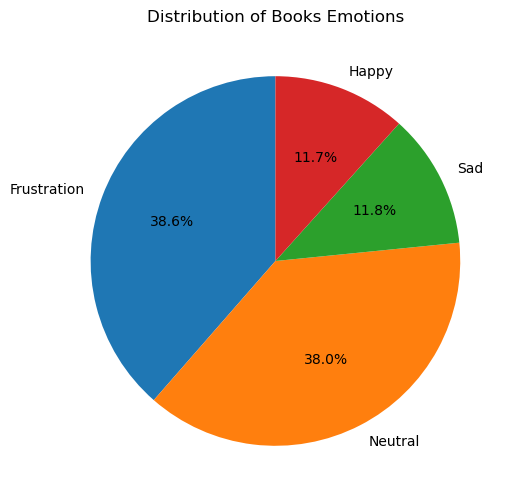

In [14]:
# Flatten the list of emotions and filter out 'Unknown' emotions
all_emotions = [emotion for emotions_list in df['emotions'] for emotion in emotions_list if emotion != 'Unknown']

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Books Emotions')
plt.show()